<a href="https://colab.research.google.com/github/2303A51596/AIML/blob/main/2303A51596___lab_examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report


In [2]:

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [4]:

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[89 12]
 [12 87]]


In [5]:

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1:.2f}")


Accuracy: 88.00%
F1-Score: 0.88


In [6]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



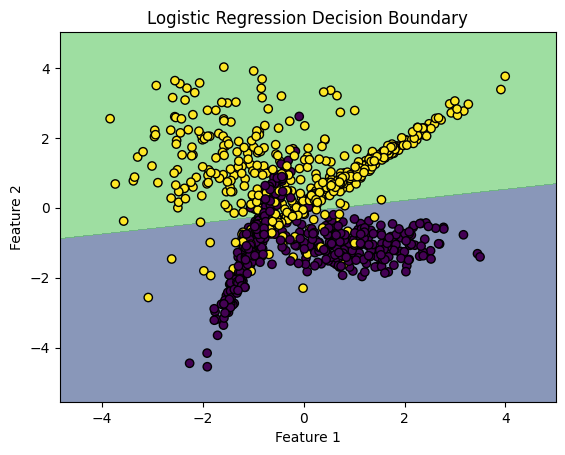

In [7]:

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [8]:

model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')  # L2 regularization
model_l2.fit(X_train, y_train)

y_pred_l2 = model_l2.predict(X_test)


In [9]:

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f"L2 Regularization - Accuracy: {accuracy_l2 * 100:.2f}%")
print(f"L2 Regularization - F1-Score: {f1_l2:.2f}")


L2 Regularization - Accuracy: 88.00%
L2 Regularization - F1-Score: 0.88


In [10]:

model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')  # L1 regularization
model_l1.fit(X_train, y_train)

y_pred_l1 = model_l1.predict(X_test)

accuracy_l1 = accuracy_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

print(f"L1 Regularization - Accuracy: {accuracy_l1 * 100:.2f}%")
print(f"L1 Regularization - F1-Score: {f1_l1:.2f}")


L1 Regularization - Accuracy: 88.00%
L1 Regularization - F1-Score: 0.88
